In [421]:
import ipywidgets as widgets
import watermark
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [422]:
data = pd.read_csv('all_perth_310121.csv')

X = data.drop(columns=['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'])
y = data.drop(columns=['ADDRESS', 'SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'])


In [423]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

29.295178368844233 %


In [424]:
linreg = LinearRegression()

In [425]:
linreg.fit(X, y)

LinearRegression()

In [426]:
y_predict = linreg.predict(X)

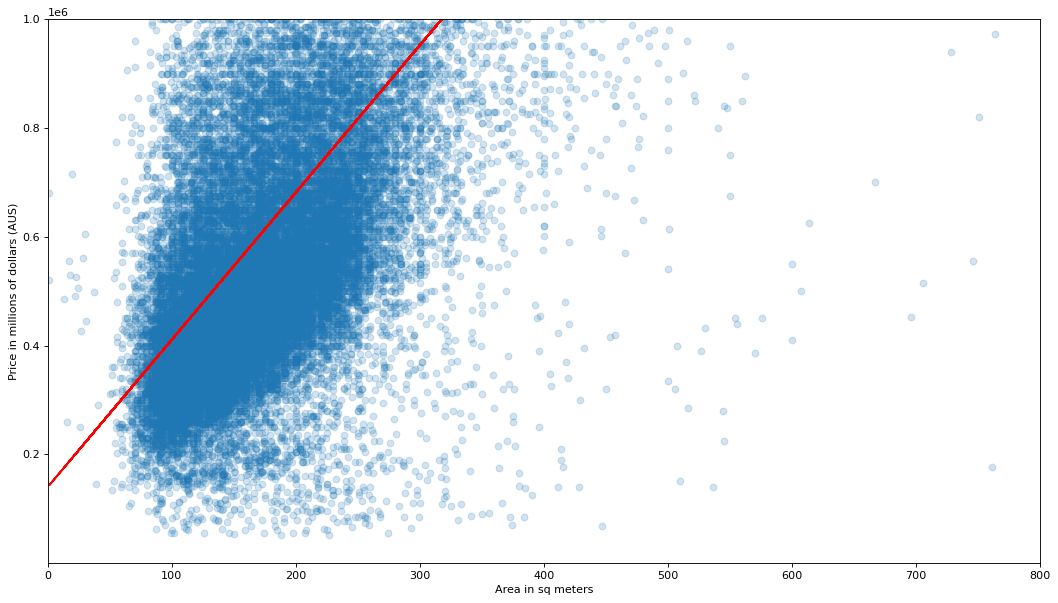

In [427]:
plt.figure(figsize=(16, 9), dpi=80)
plt.scatter(X, y, alpha=0.2)
plt.plot(X, y_predict, color='red')
plt.ylim([500, 1000000])
plt.xlim([0, 800])
plt.xlabel('Area in sq meters')
plt.ylabel('Price in millions of dollars (AUS)')
plt.show()

In [428]:
print(linreg.coef_)

[[2706.81260344]]


In [429]:
print(linreg.intercept_)
# y =(7.72x - 2706.81)

[140367.71091769]


In [430]:
# Given I actually make an interface to do calculations,
# is this good enough??
cust_h = 100
cust_w = (2707 * cust_h) + 140367
print(cust_w)

411067


In [431]:
predict_button = widgets.Button(description="Click Me!")
output = widgets.Output()
display(predict_button, output)
    
slider = widgets.IntSlider(min=100, max=300, step=1, value=100, description="Set sq meters of floor space.")
display(slider)
cust_h = slider.value

def on_button_clicked(b):
    with output:
        cust_h = slider.value
        cust_w = (2707 * cust_h) + 140367
        print("For the given sq meters " + str(cust_h) + ", the predicted price is " + str(cust_w) + ".")


predict_button.on_click(on_button_clicked)



Button(description='Click Me!', style=ButtonStyle())

Output()

IntSlider(value=100, description='Set sq meters of floor space.', max=300, min=100)

In [432]:
%load_ext watermark

# Get environment and dependencies
%watermark -v -m -p pandas,numpy,sklearn,ipywidgets,IPython,matplotlib,watermark

# date
print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

pandas    : 1.3.4
numpy     : 1.20.3
sklearn   : 0.24.2
ipywidgets: 7.6.5
IPython   : 7.29.0
matplotlib: 3.4.3
watermark : 2.3.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 8.1
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

 
Last updated: Fri Apr 08 2022 11:01:48Eastern Daylight Time

